# Entri MOD 5 Assignment 2

## Import libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Read data

In [7]:
data = pd.read_csv("Employee.csv", encoding_errors="ignore")

### Data Exploration

In [9]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [11]:
data.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [15]:
data.shape

(148, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [19]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [25]:
unique_counts = data.nunique()
print(unique_counts)

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64


In [31]:
unique_values = {col: data[col].unique() for col in data.columns}
print("\nUnique Values in Each Feature:")
for col, values in unique_values.items():
    print(f"{col}: {values}")


Unique Values in Each Feature:
Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Country: ['India']
Gender: [0 1]


### Data Cleaning

#### Duplicates

In [34]:
data.duplicated().sum()

4

In [36]:
data.drop_duplicates(inplace=True)

In [38]:
data.shape

(144, 6)

#### NULL values

In [43]:
data.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

#### check for outliers

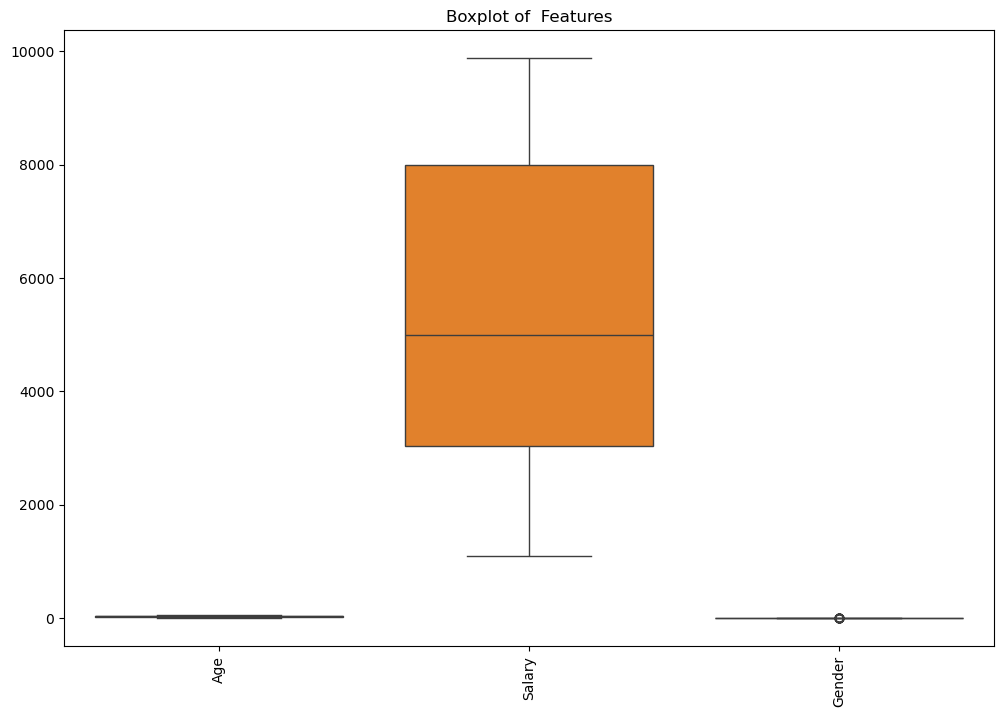

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

#### replacing null values

In [61]:
data['Age'].fillna(data['Age'].mean(), inplace=True)  
data['Salary'].fillna(data['Salary'].mean(), inplace=True) 
data['Place'].fillna(data['Place'].mode()[0], inplace=True)
data['Company'].fillna("Unknown", inplace=True)  

C:\Users\jayak\AppData\Local\Temp\ipykernel_12396\777828202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\jayak\AppData\Local\Temp\ipykernel_12396\777828202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [63]:
data.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

#### Replace age = 0 by Nan

In [72]:
data['Age'].replace(0, np.nan, inplace=True)

C:\Users\jayak\AppData\Local\Temp\ipykernel_12396\1616465475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].replace(0, np.nan, inplace=True)


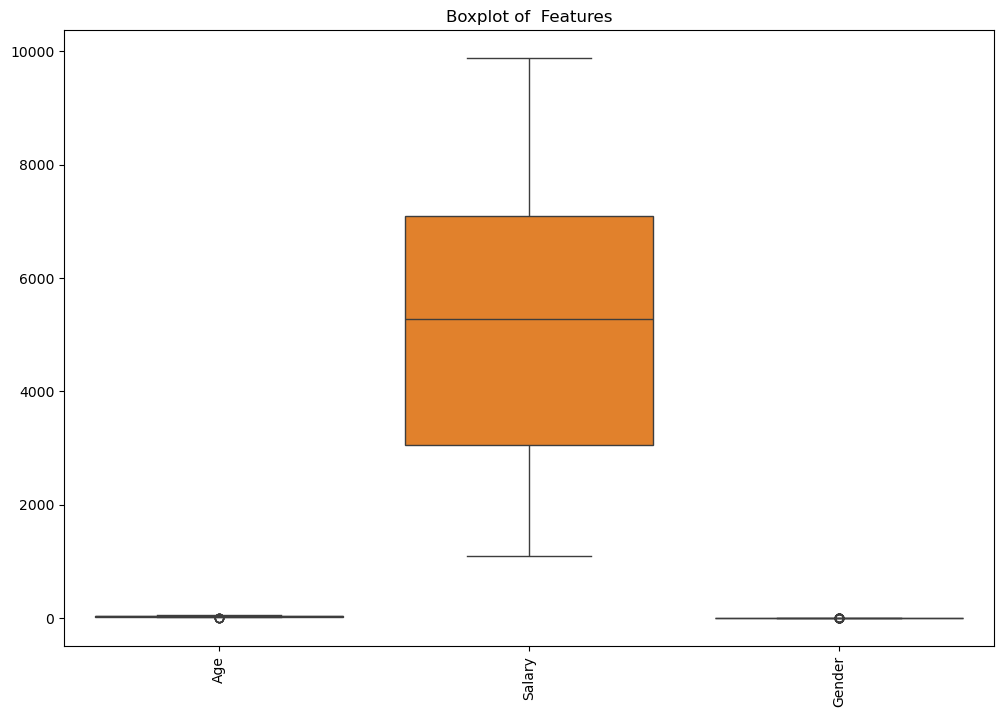

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

### Data Analysis

In [77]:
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
print(filtered_data)

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


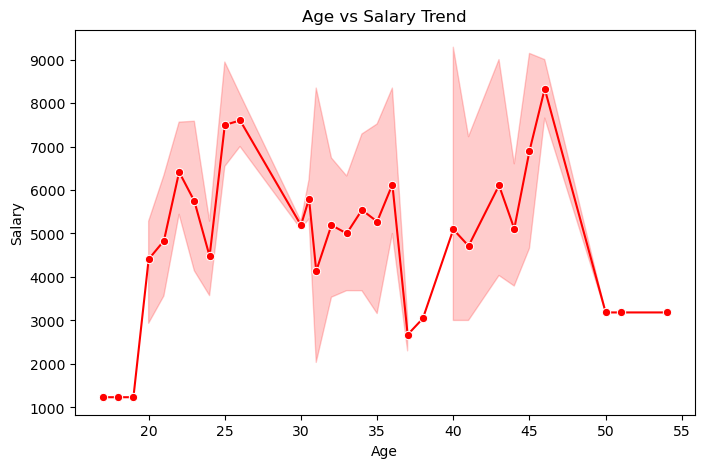

In [83]:
plt.figure(figsize=(8,5))
sns.lineplot(x=data['Age'], y=data['Salary'], marker='o', color='red')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary Trend")
plt.show()


* Younger professionals experience rapid salary growth, while mid-career individuals have fluctuations due to career changes or market conditions.
* More experienced professionals (40+) have stable salaries but may see declines at older ages.

C:\Users\jayak\AppData\Local\Temp\ipykernel_12396\2353794387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_counts.index, y=place_counts.values, palette="viridis")


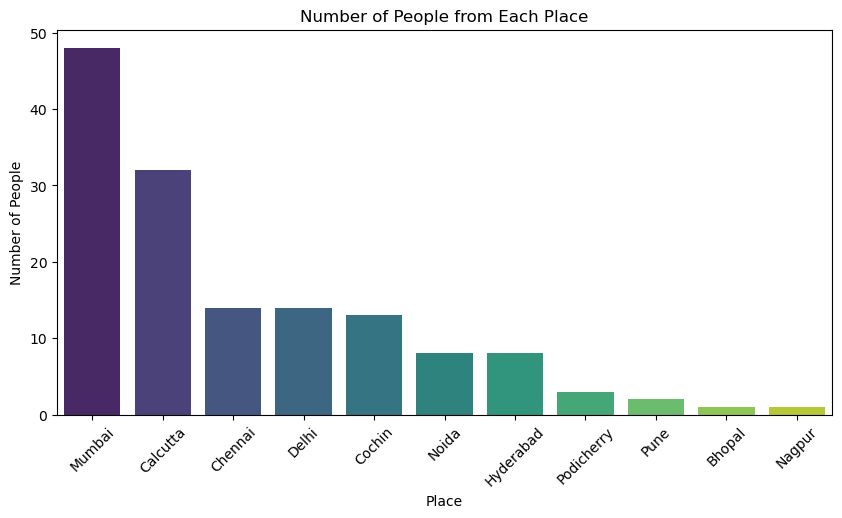

In [86]:
place_counts = data['Place'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=place_counts.index, y=place_counts.values, palette="viridis")
plt.xlabel("Place")
plt.ylabel("Number of People")
plt.title("Number of People from Each Place")
plt.xticks(rotation=45) 
plt.show()

* The largest number of people are from Mumbai, with around 50 individuals.

### Data Encoding

In [92]:
data.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

#### one hot encoding

In [95]:
categorical_columns = ['Company', 'Country', 'Place']  # List of columns to encode
data_one_hot = pd.get_dummies(data, columns=categorical_columns, prefix=categorical_columns)

# Display the result
print("One-Hot Encoded Data:")
print(data_one_hot)

One-Hot Encoded Data:
      Age       Salary  Gender  Company_CTS  Company_Congnizant  \
0    20.0  5283.471074       0        False               False   
1    30.0  5283.471074       0        False               False   
2    35.0  2300.000000       0        False               False   
3    40.0  3000.000000       0        False               False   
4    23.0  4000.000000       0        False               False   
..    ...          ...     ...          ...                 ...   
142  22.0  8202.000000       0        False               False   
143  33.0  9024.000000       1        False               False   
145  44.0  4034.000000       1        False               False   
146  33.0  5034.000000       1        False               False   
147  22.0  8202.000000       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True                    False    

#### Feature Scaling

StandardScaler

In [100]:
numerical_columns = ['Age', 'Salary']
scaler_standard = StandardScaler()
data_standard_scaled = data_one_hot.copy()
data_standard_scaled[numerical_columns] = scaler_standard.fit_transform(data_one_hot[numerical_columns])

print("\nStandard Scaled Data:")
print(data_standard_scaled)


Standard Scaled Data:
          Age    Salary  Gender  Company_CTS  Company_Congnizant  \
0   -1.411750  0.000000       0        False               False   
1   -0.220887  0.000000       0        False               False   
2    0.374545 -1.264122       0        False               False   
3    0.969977 -0.967526       0        False               False   
4   -1.054491 -0.543818       0        False               False   
..        ...       ...     ...          ...                 ...   
142 -1.173577  1.236606       0        False               False   
143  0.136372  1.584894       1        False               False   
145  1.446322 -0.529412       1        False               False   
146  0.136372 -0.105703       1        False               False   
147 -1.173577  1.236606       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True                

MinMax

In [102]:
scaler_minmax = MinMaxScaler()
data_minmax_scaled = data_one_hot.copy()
data_minmax_scaled[numerical_columns] = scaler_minmax.fit_transform(data_one_hot[numerical_columns])

print("\nMinMax Scaled Data:")
print(data_minmax_scaled)


MinMax Scaled Data:
          Age    Salary  Gender  Company_CTS  Company_Congnizant  \
0    0.081081  0.477350       0        False               False   
1    0.351351  0.477350       0        False               False   
2    0.486486  0.137817       0        False               False   
3    0.621622  0.217480       0        False               False   
4    0.162162  0.331285       0        False               False   
..        ...       ...     ...          ...                 ...   
142  0.135135  0.809491       0        False               False   
143  0.432432  0.903039       1        False               False   
145  0.729730  0.335154       1        False               False   
146  0.432432  0.448959       1        False               False   
147  0.135135  0.809491       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True                  